# **Superstore Sales Data Analysis:**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/15_Superstore_dataset2011-2015.csv", encoding='iso-8859-1')

In [3]:
# Try with latin1 encoding (most common solution for this error)
#data = pd.read_csv("00_DataSets/15_Superstore_dataset2011-2015.csv", encoding='latin1')

# If that doesn't work, try these alternatives:
#data = pd.read_csv("00_DataSets/15_Superstore_dataset2011-2015.csv", encoding='iso-8859-1')
# data = pd.read_csv("00_DataSets/15_Superstore_dataset2011-2015.csv", encoding='cp1252')

In [4]:
data.shape

(51290, 24)

In [5]:
# Top 5 rows of the dataset:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


-----
----

In [6]:
# Last 5 rows of the dataframe:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


----
-----

In [7]:
# Three random samples from the dataset:
data.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
21206,33375,CA-2014-140676,13-09-2014,16-09-2014,First Class,BF-11080,Bart Folk,Consumer,Baltimore,Maryland,...,OFF-PA-10004243,Office Supplies,Paper,Xerox 1939,94.85,5,0.0,45.5280,3.50,Medium
21587,31233,ID-2014-85970,13-11-2014,18-11-2014,Standard Class,AJ-10960,Astrea Jones,Consumer,Manukau City,Auckland,...,FUR-BO-10003589,Furniture,Bookcases,"Dania Floating Shelf Set, Traditional",101.61,1,0.4,6.7500,8.68,Medium
4144,39485,CA-2012-140375,2/10/2012,5/10/2012,Second Class,SG-20470,Sheri Gordon,Consumer,Rockville,Maryland,...,OFF-PA-10001870,Office Supplies,Paper,Xerox 202,19.44,3,0.0,9.3312,0.62,Medium


-----
-----

In [8]:
# Column names of the dataframe:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

---
-----

In [9]:
# Find the shape of the dataset:
print(data.shape)
print(f'Total Number of Rows: {data.shape[0]}')  
print(f"Total Number of Columns: {data.shape[1]}")

(51290, 24)
Total Number of Rows: 51290
Total Number of Columns: 24


In [10]:
len(data.columns) #Number of columns in the dataset

24

----
----

In [11]:
# Get overall information of the dataset:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

------
----

In [12]:
# Get overall statistics of the dataset:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [13]:
data.describe(include= "all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1464,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,130,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


----
---

In [14]:
# Check for null values in the dataset:
print(data.isnull().any())

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool


In [15]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [16]:
# Calculating the percentage of null values:
data.isnull().sum()*100 /len(data)

Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region             0.00000
Product ID         0.00000
Category           0.00000
Sub-Category       0.00000
Product Name       0.00000
Sales              0.00000
Quantity           0.00000
Discount           0.00000
Profit             0.00000
Shipping Cost      0.00000
Order Priority     0.00000
dtype: float64

----
----

In [17]:
# Check for duplicate data and drop them:
data.duplicated().any()

np.False_

----
---

In [18]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [19]:
# Drop Unnecessary columns:
data= data.drop(["Row ID", "Order ID", "Customer ID", "Postal Code"], axis= 1)

In [20]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

---
---

In [21]:
# Hypothesis-1: Technology Products have the Higest Profit 
# Margin compared to the other 
# product category:
data.groupby(by= "Category")["Profit"].mean()

Category
Furniture          28.878567
Office Supplies    16.578961
Technology         65.454958
Name: Profit, dtype: float64

<Axes: xlabel='Category', ylabel='Profit'>

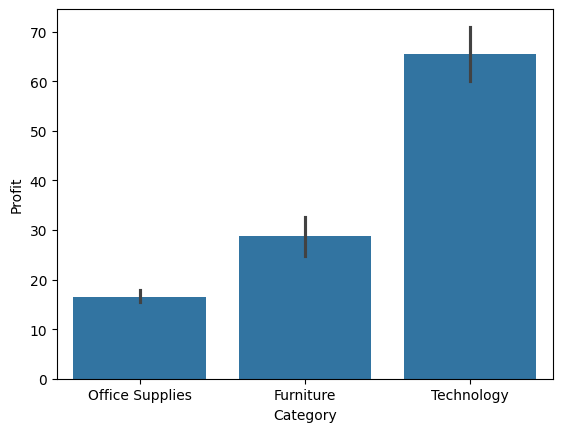

In [22]:
sns.barplot(data= data, x= "Category", y= "Profit")

The Hypothesis is Accepted.

----
----
----

In [23]:
# Hypothesis-2: The East Region has the higest sales 
# compared to other regions:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [24]:
data["Region"].value_counts()

Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

In [25]:
# To avoid the Exponential values in the Sales column:

# Using pandas option (recommended for all float displays)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [26]:
data.groupby(by= "Region")["Sales"].sum()

Region
Africa            783773.21
Canada             66928.17
Caribbean         324280.86
Central          2822302.52
Central Asia      752826.57
EMEA              806161.31
East              678781.24
North            1248165.60
North Asia        848309.78
Oceania          1100184.61
South            1600907.04
Southeast Asia    884423.17
West              725457.82
Name: Sales, dtype: float64

In [27]:
data1= data.groupby(by= "Region")["Sales"].sum().sort_values(ascending= False).reset_index()

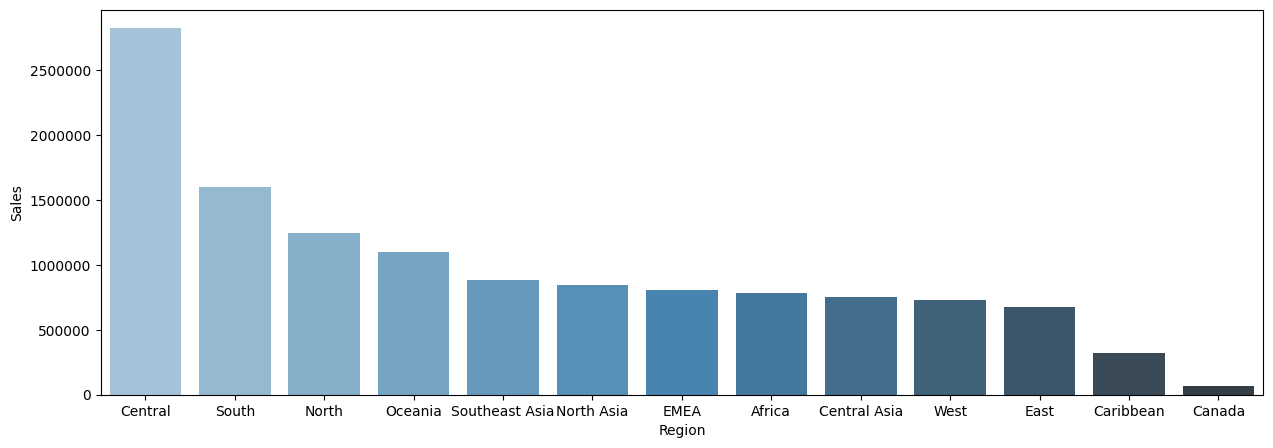

In [28]:
plt.figure(figsize=(15, 5))
sns.barplot(x= "Region", y= "Sales", data= data1, palette="Blues_d", hue= "Region", legend= False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

 The Hypothesis is Rejected.

-----
----
----

In [29]:
# Hypothesis-3: Sales are higher during 
# certain months of the year:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [30]:
data[["Sales", 'Order Date']].head(3)

,Sales,Order Date
0,408.30,1/1/2011
1,120.37,1/1/2011
2,66.12,1/1/2011


In [31]:
data[["Sales", 'Order Date']].dtypes

Sales         float64
Order Date     object
dtype: object

In [32]:
data["Order Month"]= pd.DatetimeIndex(data["Order Date"]).month

In [33]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [34]:
com= data.groupby(by= "Order Month")["Sales"].sum().reset_index()

In [35]:
com

,Order Month,Sales
0,1,775766.91
1,2,722853.17
2,3,951333.08
3,4,851617.32
4,5,976415.68
5,6,1152367.79
6,7,838743.56
7,8,1247500.81
8,9,1244139.73
9,10,1120777.47


In [36]:
com.index

RangeIndex(start=0, stop=12, step=1)

In [37]:
com.replace([1, 2, 3, 4, 5, 6, 7, 8,9, 10,11, 12], ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"], inplace= True)

In [38]:
com

,Order Month,Sales
0,Jan,775766.91
1,Feb,722853.17
2,Mar,951333.08
3,Apr,851617.32
4,May,976415.68
5,June,1152367.79
6,July,838743.56
7,Aug,1247500.81
8,Sept,1244139.73
9,Oct,1120777.47


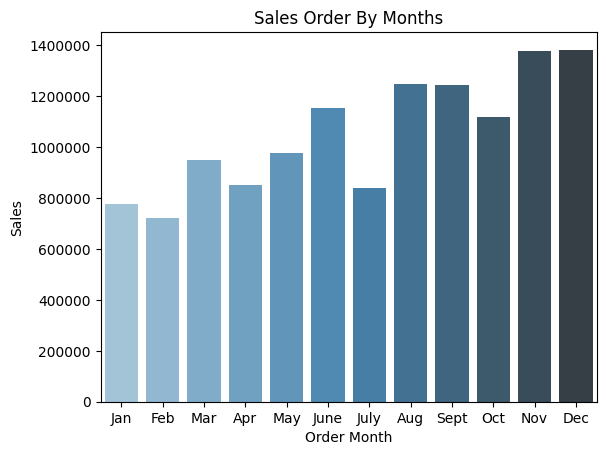

In [39]:
sns.barplot(x= "Order Month", y= "Sales", data= com, palette= "Blues_d", hue= "Order Month", legend= False) 
plt.title("Sales Order By Months")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The Hypothesis is Accepted as the Sales are high during November and Decembers.

-----
-----

In [40]:
# Hypothesis-4: Orders with same day 
# shipping have the lowest rate of 
# returned products:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [41]:
data["Ship Mode"].value_counts()
# so, we have to work with this "Ship Mode" column

# And from Profit column we have to find the Rate
# of return for each Ship Mode:

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [42]:
data["Profit"]

0       106.14
1        36.04
2        29.64
3       -26.05
4        37.77
         ...  
51285     4.52
51286     0.42
51287    12.36
51288     0.56
51289    -0.60
Name: Profit, Length: 51290, dtype: float64

<Axes: >

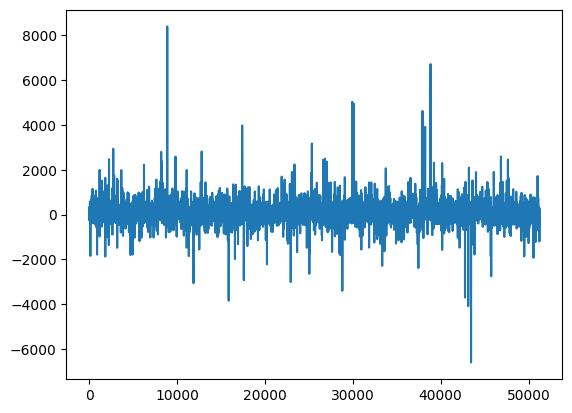

In [43]:
data["Profit"].plot(kind= "line")

Now, I assume if Profit from the product is greater than 0, then the product is profitable. If it is not, then the product is not profitable and hence it is returned product. This is not always the case but lets assume in this case.

In [44]:
data.groupby(by= "Ship Mode").count()

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Month
Ship Mode,,,,,,,,,,,,,,,,,,,,
First Class,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505
Same Day,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701
Second Class,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309
Standard Class,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775


In [45]:
total_orders_by_shipping_mode= data.groupby(by= "Ship Mode").size()
returned_orders_by_shipping_mode= data[data["Profit"]<0].groupby(by= "Ship Mode").size()

return_per_by_shipping_mode= (returned_orders_by_shipping_mode)/ (total_orders_by_shipping_mode)*100
return_per_by_shipping_mode

Ship Mode
First Class      25.08
Same Day         23.92
Second Class     24.08
Standard Class   24.48
dtype: float64

So, The Rate of Return By Shipping Mode is least for "Same Day" Shipping Mode and highest for "First Class" Shipping Mode.

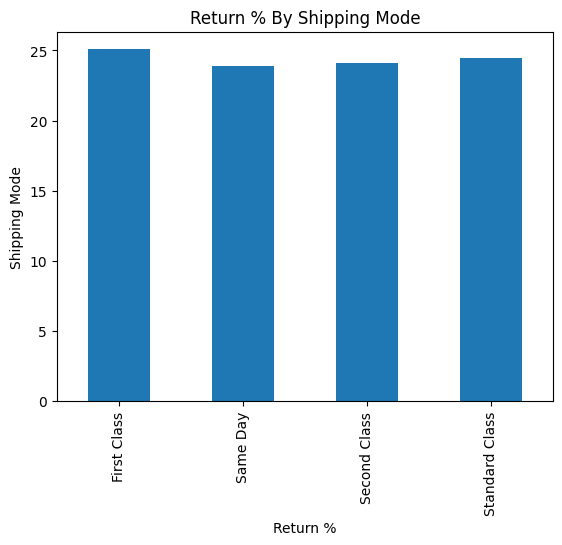

In [46]:
return_per_by_shipping_mode.plot(kind= "bar")
plt.title("Return % By Shipping Mode")
plt.xlabel("Return %")
plt.ylabel("Shipping Mode")
plt.show()

-----
-----

In [48]:
# Hypothesis-5: The company's profit is
#  more on weekdays than on weekends:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [50]:
data["Order Day"]= pd.DatetimeIndex(data["Order Date"]).day_name()

In [52]:
data.groupby(by= "Order Day")["Profit"].sum()

Order Day
Friday      243802.84
Monday      246526.56
Saturday    176486.55
Sunday      104117.91
Thursday    241183.08
Tuesday     249788.05
Wednesday   205552.31
Name: Profit, dtype: float64

In [54]:
data2= data.groupby(by= "Order Day")["Profit"].sum().sort_values(ascending= False)

<Axes: xlabel='Order Day'>

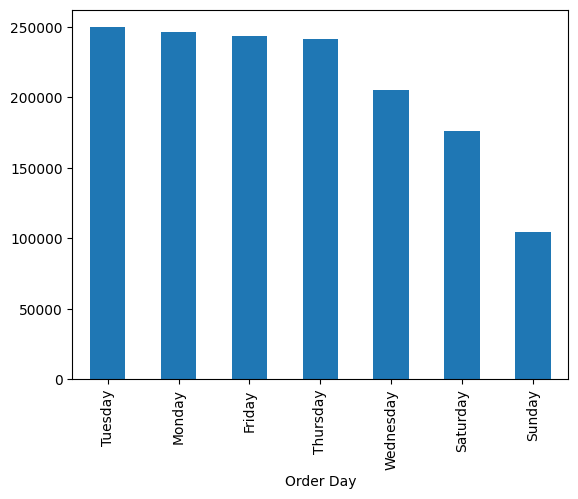

In [56]:
data2.plot(kind= "bar")

The Hypothesis is Accepted.

-----
----

In [ ]:
# 